<a href="https://colab.research.google.com/github/mbaishnavee05/Retail_Sales_Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# **1**.**Mounting of Drive, Loading Data and Importing of the required libraries**

In [ ]:
# Mounting of google drive to feth the Raw_DATA_SET
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Libraries which are necessary and their importing.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import datetime as dt
import warnings; warnings.simplefilter('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # data visualization
init_notebook_mode(connected=True)

import cufflinks as cf #  to call plots directly off of a pandas dataframe
cf.go_offline()

In [ ]:
# Fetching the given datset using pandas
df1=pd.read_csv('/content/drive/MyDrive/ML Almabetter Projects Retail Sales Prediction/Rossmann Stores Data.csv')
df2=pd.read_csv('//content/drive/MyDrive/ML Almabetter Projects Retail Sales Prediction/store.csv')

In [ ]:
#First look
#Top 5 rows of the data set
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
#last 5 rows of the dataset
df1.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
df2.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
#No of rows and columns of the dataset
df1.shape

(1017209, 9)

In [ ]:
df2.shape

(1115, 10)

In [ ]:
#info function will tell the count of null values and the data types of the columns
df1.info

<bound method DataFrame.info of          Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0       

In [ ]:
df2.info

<bound method DataFrame.info of       Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3      

In [ ]:
merged_data = pd.merge(df1,df2,on='Store')
merged_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
merged_data.info

<bound method DataFrame.info of          Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            1          4  2015-07-30   5020        546     1      1   
2            1          3  2015-07-29   4782        523     1      1   
3            1          2  2015-07-28   5011        560     1      1   
4            1          1  2015-07-27   6102        612     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1115          6  2013-01-05   4771        339     1      0   
1017205   1115          5  2013-01-04   4540        326     1      0   
1017206   1115          4  2013-01-03   4297        300     1      0   
1017207   1115          3  2013-01-02   3697        305     1      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0  

# **2. Null Values Operation**

## 2.1 Counting the null values in each dataset.

In [ ]:
df1.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
df2.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Here we can see that only df2 have missing values so we fill them with appropriate value.

In [ ]:
# Filling Promo2SinceWeek, Promo2SinceYear, PromoInterval with 0
df2.update(df2['Promo2SinceWeek'].fillna(value=0,inplace=True))
df2.update(df2['Promo2SinceYear'].fillna(value=0,inplace=True))
df2.update(df2['PromoInterval'].fillna(value=0,inplace=True))

In [ ]:
# Filling CompetitionDistance with mean distance
mean_CompetitionDistance = df2['CompetitionDistance'].mean()
df2.update(df2['CompetitionDistance'].fillna(value=mean_CompetitionDistance,inplace=True))

In [ ]:
# Filling CompetitionOpenSinceMonth, CompetitionOpenSinceYear with most occuring month and year respectively
mode_CompetitionOpenSinceMonth = df2['CompetitionOpenSinceMonth'].mode()[0]
mode_CompetitionOpenSinceYear = df2['CompetitionOpenSinceYear'].mode()[0]

df2.update(df2['CompetitionOpenSinceMonth'].fillna(value=mode_CompetitionOpenSinceMonth,inplace=True))
df2.update(df2['CompetitionOpenSinceYear'].fillna(value=mode_CompetitionOpenSinceYear,inplace=True))


In [ ]:
df2.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
merged_data = pd.merge(df1,df2,on='Store')
print(merged_data.shape)
merged_data.head(5)

(1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [ ]:
merged_data.isnull().mean()*100

Store                        0.0
DayOfWeek                    0.0
Date                         0.0
Sales                        0.0
Customers                    0.0
Open                         0.0
Promo                        0.0
StateHoliday                 0.0
SchoolHoliday                0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

**Great ! We don't have any null values, we can proceed further.**

# **3**. **Exploratory Data Analysis**

In [ ]:
merged_data.Date.unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

**The dataset is from 1 January 2013 to 31 July 2015 , i.e. approx. 2.5 yrs.**

# 3.1 How many open or closed stores are in the data?

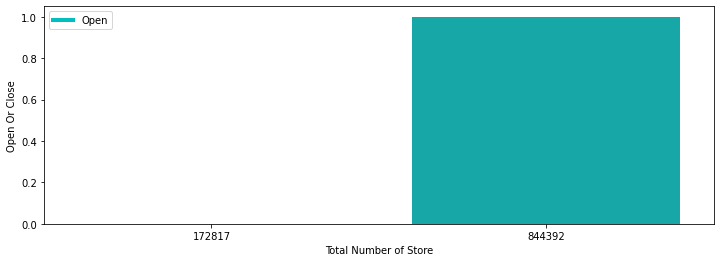

In [ ]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
x=merged_data.groupby(['Open'])[['Store']].count()
x=x.reset_index()
labels=['Open','Closed']
sns.barplot(x['Store'],x['Open'],color='c')
plt.xlabel('Total Number of Store')
plt.ylabel('Open Or Close')
legend_elements = [Line2D([0], [0], color='c', lw=4, label='Open')]
plt.legend(handles=legend_elements);
plt.show()


In above figure, there are 172817 closed stores and there are 844392 open stores.

# 3.2 How many Promo is in the data?

<bound method Series.unique of 0    628857
1    387552
Name: Promo, dtype: int64>

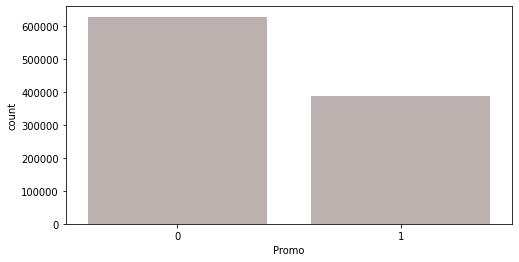

In [ ]:
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='Promo', data = merged_data,
              color="salmon",
              saturation = 0.1)
merged_data['Promo'].value_counts().unique

 There are 629129 no promotions, and there are 388080 promotions in the data.

#3.3 Which day has the Promotion?

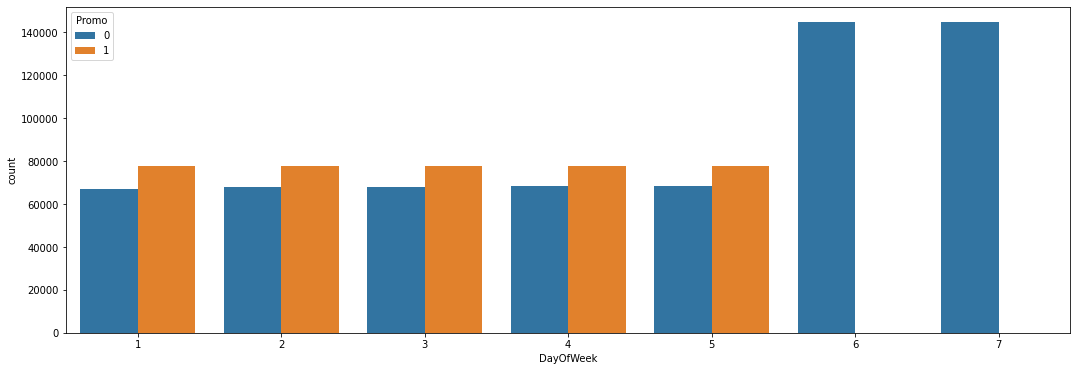

In [ ]:
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='DayOfWeek',hue='Promo',data=df1)

In the above figure, all of the weekday has a promotion. The weekend has no promotion.

#3.4 Does Promotion affect the Sales Price?

Text(0.5, 1.0, 'Sales with Promotion')

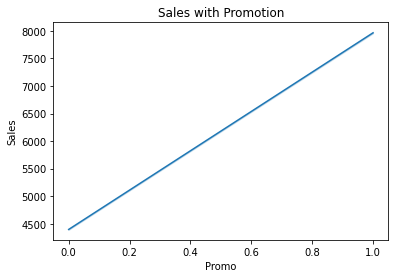

In [ ]:
sns.lineplot(x="Promo",  y = 'Sales',data =merged_data).set_title("Sales with Promotion")

The sales price has the highest when there is a promotion.

#3.5 Which store has the more Customers?

Text(0, 0.5, 'Customer')

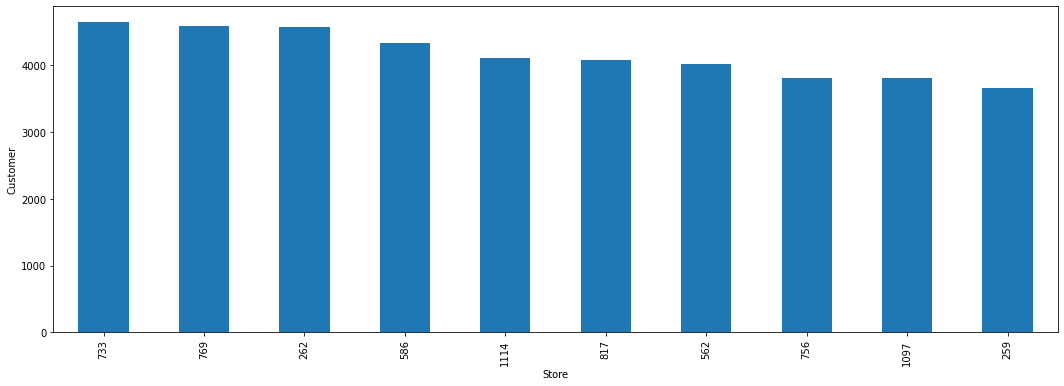

In [ ]:
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)

merged_data.groupby('Store').agg({'Customers': 'max'})['Customers'].nlargest(10).plot.bar()
plt.xlabel('Store')
plt.ylabel('Customer')

In the figure, the store which is 733 number has the maximum number of customers.

#3.6 State Holidays and Sales

Text(0.5, 1.0, 'State Holidays and Sales')

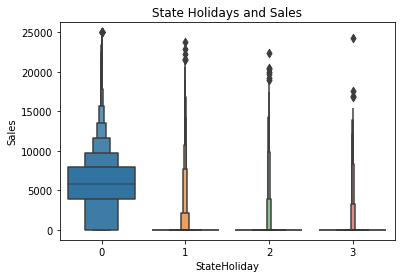

In [ ]:
sns.boxenplot(y = 'Sales', x = 'StateHoliday', data=merged_data )
plt.title('State Holidays and Sales')

There are no sales during the public holiday period. Therefore, important holidays affect sales.

#3.7 Sales Vs State Holidays

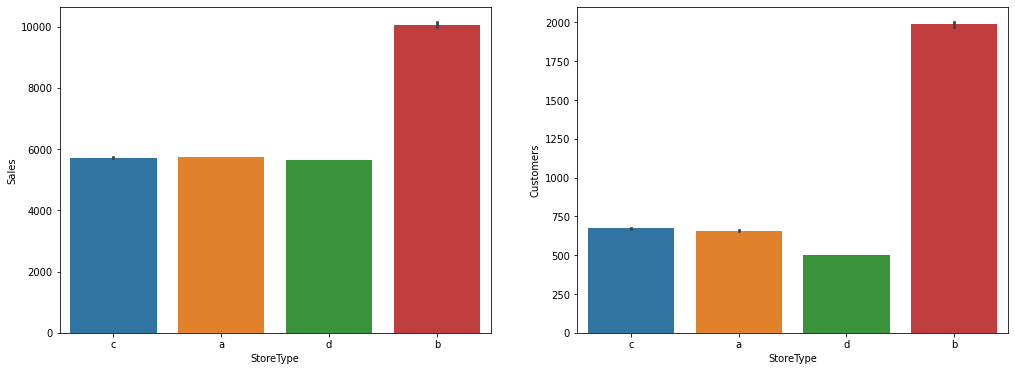

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(17,6))
sns.barplot(x=merged_data['StoreType'],y=merged_data['Sales'], ax=axis1)
sns.barplot(x=merged_data['StoreType'],y=merged_data['Customers'], ax=axis2)

In the left figure, the b store has the highest sales. a, c, d stores have the same sales prices approximately. When we look at the right figure, b has the highest number of customers with a clear difference. In this figure, only the d store has the lowest number of customers but it has the same sales prices compared to a and c stores.

#3.8 Sales Vs School Holidays

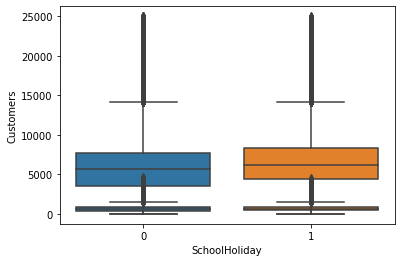

In [ ]:
sns.boxplot(x=merged_data['SchoolHoliday'], y=merged_data['Sales'])
sns.boxplot(x=merged_data['SchoolHoliday'], y=merged_data['Customers'])            

When we look at the two figures, O shows the no school holidays and 1 shows the school holidays. we can clearly see that the school holiday increases the sales price and customers proportionally.

#3.9 Correlation Analysis

Correlation analysis shows the relationship between 2 features. This analysis helps us to understand which features are positive or negative relationships.

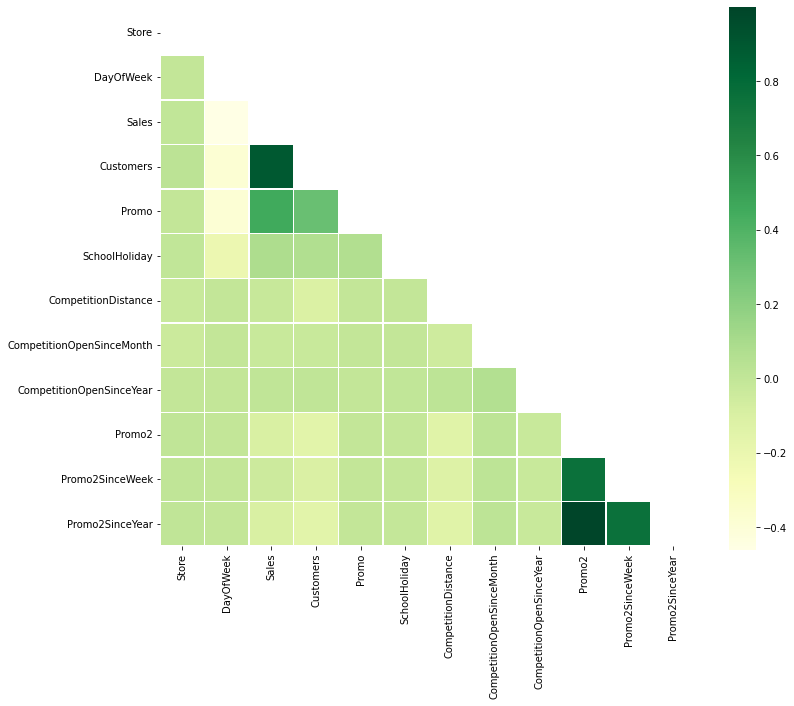

In [ ]:
# Compute the correlation matrix 
# exclude 'Open' variable
corr_all = merged_data.drop('Open', axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "YlGn")      
plt.show()

In the above figure, the heat map shows the relationship between two features. Each two features values must be between -1 and 1. When we explain the map:

**-1** means that there is a negative relationship between 2 features. For example, Customers and PromoInterval have a negative relationship. The colour of the value is light blue.

**0** means that there is no relationship between 2 features.

**1** means that there is a positive relationship between 2 features. For example, Promo2 and Promo2SinceYear have a strong positive relationship.

#3.10  Outliers Detection and Removal.

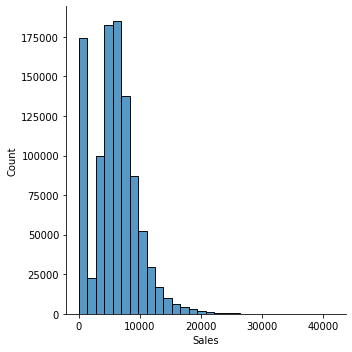

In [ ]:
sns.displot(merged_data,x='Sales',bins=30)

**From the above graph we can observe that sales >25k are very less, so it might be an outlier.**

Now we will check the Z-Score and see if any datapoint have greater than 3 z-score then we treat them as Outlier

Total Outliers:  9731


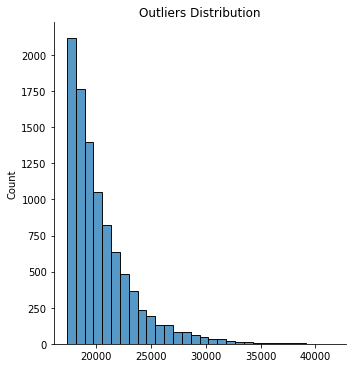

In [ ]:
mean_sales = np.mean(merged_data['Sales'])
std_sales = np.std(merged_data['Sales'])

threshold = 3

outliers = []
for i in merged_data['Sales']:
    z_score = (i-mean_sales)/std_sales
    if z_score > threshold:
        outliers.append(i)
        
print('Total Outliers: ', len(outliers))

sns.displot(x=outliers,bins=30).set(title='Outliers Distribution')

In [ ]:
# Percentage of Outliers 
zero_sales = merged_data.loc[merged_data['Sales']==0]
sales_greater_than_25k = merged_data.loc[merged_data['Sales'] > 25000]
print('Total percentage of 0 in dataset: %.3f%%' %((len(zero_sales)/len(merged_data))*100))
print('Total percentage of sales >25k in dataset: %.3f%% ' %((len(sales_greater_than_25k)/len(merged_data))*100))

Total percentage of 0 in dataset: 16.995%
Total percentage of sales >25k in dataset: 0.075% 


**As we can see that we have very less percentage of sales datapoints that are >25k so we can drop them.**

In [ ]:
merged_data.drop(merged_data.loc[merged_data['Sales'] > 25000].index,inplace=True)

In [ ]:
merged_data.shape

(1016451, 18)

# **4. Inferences from EDA**



All of the weekday has a promotion and the weekend has no promotion.

The sales price has the highest when there is a promotion.


 All Type ‘b’ stores have comparatively higher sales and it mostly constant with peaks
appears on weekends.

Majority of Stores remains closed on state holidays.

School holiday increases the sales price and customers proportionally.


#**5**. **Feature Engineering**

###5.1 Converting Categorical Variable to Numeric:

In [ ]:
merged_data.drop(merged_data.loc[(merged_data['Sales']==0) & (merged_data['Open'] == 1)
                                     & (merged_data['StateHoliday'] == 0) & 
                                     (merged_data['SchoolHoliday'] == 0)].index,inplace=True)
print(merged_data.shape)

(1016439, 18)


In [ ]:
merged_data['Year'] = merged_data['Date'].apply(lambda x: int(str(x)[0:4]))
merged_data['Month'] = merged_data['Date'].apply(lambda x: int(str(x)[5:7]))
merged_data.drop(['Date'],axis=1,inplace=True)

merged_data.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,4,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,3,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,2,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,1,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7


In [ ]:
merged_data.dtypes

Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
Year                           int64
Month                          int64
dtype: object

In [ ]:
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"

merged_data['StateHoliday'].loc[merged_data['StateHoliday'] == 0] = '0'

In [ ]:
# PromoInterval column has values 0 & "0", So, we need to change values with 0 to "0"

merged_data['PromoInterval'].loc[merged_data['PromoInterval'] == 0] = '0'

In [ ]:
merged_data['PromoInterval'].head()

0    0
1    0
2    0
3    0
4    0
Name: PromoInterval, dtype: object

In [ ]:
# encoding all categorical varibale to numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

merged_data['StoreType'] = label_encoder.fit_transform(merged_data['StoreType'])
merged_data['Assortment'] = label_encoder.fit_transform(merged_data['Assortment'])
merged_data['StateHoliday'] = label_encoder.fit_transform(merged_data['StateHoliday'])
merged_data['PromoInterval'] = label_encoder.fit_transform(merged_data['PromoInterval'])

merged_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,4,5020,546,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,3,4782,523,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,2,5011,560,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,1,6102,612,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7


##5.2 Looking at the scenerio where the Stores are open and yet there is no sales on that day.

In [ ]:
no_sales = merged_data.loc[(merged_data['Sales']==0) & (merged_data['Open'] == 1) & (merged_data['StateHoliday'] == 0) 
                               & (merged_data['SchoolHoliday'] == 0)]
print(no_sales.shape)
no_sales.head()

(30, 19)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
51491,57,2,0,0,1,1,0,0,3,2,420.0,6.0,2014.0,0,0.0,0.0,0,2014,7
92582,102,6,0,0,1,0,0,0,0,0,150.0,12.0,2007.0,1,10.0,2014.0,3,2014,7
210424,232,4,0,0,1,1,0,0,2,2,13570.0,5.0,2010.0,1,10.0,2013.0,3,2013,1
235476,259,4,0,0,1,1,0,0,1,1,210.0,9.0,2013.0,0,0.0,0.0,0,2013,2
308819,339,4,0,0,1,0,0,0,0,2,2280.0,9.0,2013.0,1,10.0,2013.0,3,2013,1


**Observation:**

There are total 30 days where there is no record of sales even without any holidays. We can remove these data points too.

In [ ]:
merged_data.drop(merged_data.loc[(merged_data['Sales']==0) & (merged_data['Open'] == 1)
                                     & (merged_data['StateHoliday'] == 0) & 
                                     (merged_data['SchoolHoliday'] == 0)].index,inplace=True)
print(merged_data.shape)

(1016409, 19)


In [ ]:
merged_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,4,5020,546,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,3,4782,523,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,2,5011,560,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,1,6102,612,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7


#**6.** **Building a Regression Model**

## Here we want our ML model to predict sales only when they are open and we know that there will be no sales if the store is closed.

In [ ]:
merged_data_open = merged_data[merged_data['Open']==1]
merged_data_closed = merged_data[merged_data['Open']==0]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

X_train, X_test, y_train, y_test_open = train_test_split(merged_data_open.drop(['Sales','Customers','Open',],axis=1),
                                                        merged_data_open['Sales'], test_size=0.2, random_state=23)

In [ ]:
X_train.columns

Index(['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month'],
      dtype='object')

In [ ]:
y_train.head()

971475    3345
89177     5057
351720    9267
489190    5850
67112     4536
Name: Sales, dtype: int64

In [ ]:
y_test_closed = np.zeros(merged_data_closed.shape[0])
y_test = np.append(y_test_open, y_test_closed)

##6.1 Linear Regression Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
prediction_open = model.predict(X_test)
prediction_closed = np.zeros(merged_data_closed.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

In [ ]:
#Performance of the model

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

r2_score: 0.7773037453225706
Mean absolute error: 995.40
Root mean squared error:  1923.5239720480379


Text(0, 0.5, 'Predicted values')

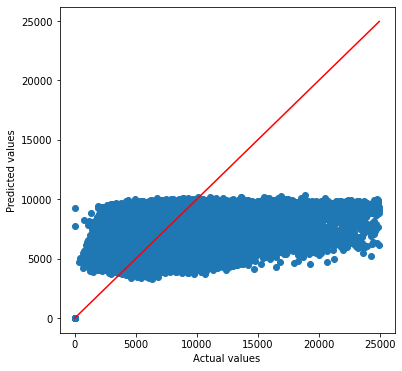

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

**Observation:**

From the above plot we can see that Linear regression model is performing badly as its not making any predictions more than 10000 even for 25000 sales.

##6.2 Decision Tree Regressor

r2_score: 0.9509703546033716
Mean absolute error: 423.22
Root mean squared error:  902.5484457830185


Text(0, 0.5, 'Predicted values')

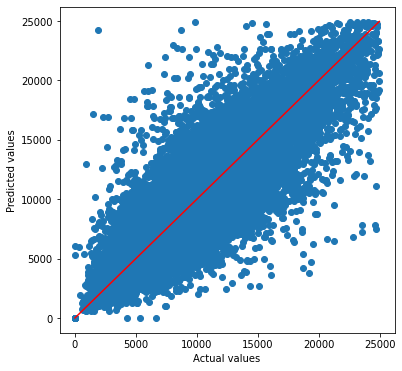

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train,y_train)

prediction_open = model.predict(X_test)
prediction_closed = np.zeros(merged_data_closed.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

# Performance of the model

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(6,6))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

**Observation:**

The decision tree regressor performing well compared to Linear Regression.

##6.3 Random Forest Regressor

r2_score: 0.9654439779510336
Mean absolute error: 357.32
Root mean squared error:  757.7099979302317


Text(0, 0.5, 'Predicted values')

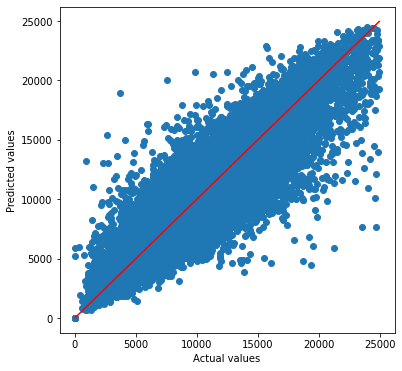

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=100)
random_forest_model.fit(X_train,y_train)

prediction_open = random_forest_model.predict(X_test)
prediction_closed = np.zeros(merged_data_closed.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

# Performance of the model

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(6,6))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

**Observation:**

Random Forest regressor had the lowest error as compared to other models, which means it is better at predicting sales than other models.

# **Conclusion:**

## Random Forest Regressor is the best for this Dataset Problem.